# Temel Bieleşn Analizi

Genel mantık bildiğin gibi boyut indirgeme. Deiğkne sayısından daha az boyutlu hala getirme . Demek istediğim biliyorsun ki iüç değişkeni ifade edbilmenin  yolu 3 boyutlu bir düzlem işte bu üç değişkenli veriyi aaz bi kayıpla boyut indirgemesi yapıp iki boyutlu düzlemde inceliyoruz gibi.

Son halde değişkenler aralarında koralasyonsuz olurlar.

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

In [3]:
data=pd.read_csv("USArrests.csv")
df=data.copy()
df.index=df.iloc[:,0]
df=df.iloc[:,1:]
df=df.rename_axis(index=None)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
#dostum pca'de hatılarsın veri standartlaştırma işlemi yapmamız gerekir
from sklearn.preprocessing import StandardScaler
df=StandardScaler().fit_transform(df)
df[:5,:5]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

In [7]:
from sklearn.decomposition import PCA

In [11]:
pca=PCA(n_components=2)
pca_fit=pca.fit_transform(df)

In [12]:
componant_df=pd.DataFrame(data=pca_fit,columns=["birinci bileşen","ikinci bileşen "])

In [16]:
componant_df[:4]
#hocam burada gördüğün şey ne biliyor musun? Evet bilmiyorsun cahil😂
#bu aralar ilber ortaylı dinliyorum kusuruma bakma😅
#evet buradaki gördüğümüz data frame aslında normal datamızın yanısı. ancak biliyorsun ki datamız bes değişknliydi 
#şimdiburada bahsettiğmiz boyut indirgemem işlemlerini yaparak aynı datyı iki değişkne ile ifade ettik iki boyutlu hale getirdik aslında.

,birinci bileşen,ikinci bileşen
0,0.985566,1.133392
1,1.950138,1.073213
2,1.763164,-0.745957
3,-0.141420,1.119797


In [17]:
#peki biz indirgeme yaptık ve arada da dedik ki az bir kayıpla yapılır. 
#Peki kayıp ne kadar bu indirgemeden sonra elimizdeki değişkenler ver setini ne kadar açıklayanbililyor

pca.explained_variance_ratio_

array([0.62006039, 0.24744129])

In [19]:
0.62006039+ 0.24744129
#toplamda açıklanabilen varyans ~%87

0.86750168

In [21]:
#hadi boyutu arttıralım
pca=PCA(n_components=3)
pca_fit=pca.fit_transform(df)
componant_df=pd.DataFrame(data=pca_fit,columns=["birinci bileşen","ikinci bileşen","ücüncü bileşen"])
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 ])

In [23]:
0.62006039+0.24744129+0.0891408 #hocam toplam açıklanabilirilk evet arttı 
#ancak dikkat edersen bileşenlerin giderek açıklayabilmesi düştü yani aslında veri setini iki-üç boyutla açıklamak mümkün çok çok arttırdığında 
#aslında yeni bileşeneşrin okadar gerekli olmadığını görürüz

0.9566424800000001

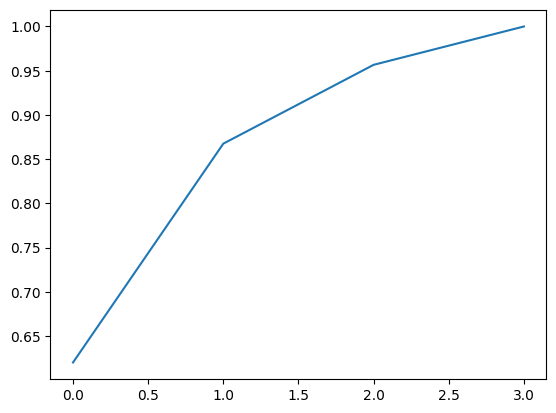

In [27]:
#buraya kadar tamma üç boyuta indirgedik %95 gibi ciddi bir oranda da açıkladık
#Peki ya kendşm emin olamıyorsam genel bir boyut sayısı ve açıklanabilirlik ilşkisi gözlemleyebilir miyim?
#Tabiki evet:)
pca=PCA().fit(df)#bileşen sayısı belirtmeden yeni bir nesne oluşturduk ve  fit ettik
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#altta eklene kısım gibi düşüneleim yani 0 dediğiyer bir boyut ikinin üzer, %95 üstü o da üç boyut oluyor
#zaten veri seti dort değişkneli bu durmda boyut dort olunca %100 açıklanıyor haşiyle :)